In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix, accuracy_score

In [2]:
# to install library we use '!pip install' maybe at times without !
# !pip install scikit-learn

In [3]:
# read & preview burnout data
burnout = pd.read_excel("../data/case_study_burnout.xlsx")
burnout.head()

,job_title,duration,contract,education,age_group,number_children,residency_status,gender,emotionally_drained_score,working_w_others_effort_score,...,care_score,accomplishment_score,energy_score,understanding_score,problem_solving_score,emotional_problems_score,influence_score,atmosphere_score,refreshed_score,looking_for_another_job
0,Coordinator,Less than 1 year,4,1,31-35,1,H,F,1,1,...,1,5,4,6,5,6,5,5,6,1
1,Manager,5 to 10 years,1,4,36-40,2,H,F,3,6,...,1,6,6,6,6,5,6,5,5,0
2,Administrator,10 + years,1,5,51-60,2,H,F,2,2,...,1,2,3,4,6,5,6,6,5,1
3,Coordinator,Less than 1 year,2,3,25-30,0,R,F,4,6,...,1,5,5,7,7,5,7,7,3,0
4,Manager,5 to 10 years,1,3,25-30,0,H,M,3,3,...,1,6,6,6,6,6,6,7,7,1


In [4]:
# data of 36 employees and 31 potential variables to explore

burnout.shape

(36, 31)

In [5]:
burnout.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 31 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   job_title                      36 non-null     object
 1   duration                       36 non-null     object
 2   contract                       36 non-null     int64 
 3   education                      36 non-null     int64 
 4   age_group                      36 non-null     object
 5   number_children                36 non-null     object
 6   residency_status               36 non-null     object
 7   gender                         36 non-null     object
 8   emotionally_drained_score      36 non-null     int64 
 9   working_w_others_effort_score  36 non-null     int64 
 10  break_down_score               36 non-null     int64 
 11  frustration_score              36 non-null     int64 
 12  difficulty_score               36 non-null     int64 
 13  contact

In [6]:
# to build the machine learning model we need to work with only numerical data
# for now, we will create two dataframes and only select the numerical variables

# to select numerical data we use select_dtypes()
features = burnout.select_dtypes(["int64", "float64"])
features.drop(['looking_for_another_job'],axis=1,inplace=True)

# features then to mean x-variable & target is y-variable

target = burnout.looking_for_another_job

In [7]:
features.head()

,contract,education,emotionally_drained_score,working_w_others_effort_score,break_down_score,frustration_score,difficulty_score,contact_score,end_of_my_rope_score,clients_objects_score,...,sensitivity_score,care_score,accomplishment_score,energy_score,understanding_score,problem_solving_score,emotional_problems_score,influence_score,atmosphere_score,refreshed_score
0,4,1,1,1,1,1,1,1,1,1,...,1,1,5,4,6,5,6,5,5,6
1,1,4,3,6,1,2,4,1,1,1,...,1,1,6,6,6,6,5,6,5,5
2,1,5,2,2,1,2,2,1,1,1,...,1,1,2,3,4,6,5,6,6,5
3,2,3,4,6,3,2,2,5,1,1,...,4,1,5,5,7,7,5,7,7,3
4,1,3,3,3,2,2,2,2,1,1,...,1,1,6,6,6,6,6,6,7,7


In [8]:
# check the info of features

features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype
---  ------                         --------------  -----
 0   contract                       36 non-null     int64
 1   education                      36 non-null     int64
 2   emotionally_drained_score      36 non-null     int64
 3   working_w_others_effort_score  36 non-null     int64
 4   break_down_score               36 non-null     int64
 5   frustration_score              36 non-null     int64
 6   difficulty_score               36 non-null     int64
 7   contact_score                  36 non-null     int64
 8   end_of_my_rope_score           36 non-null     int64
 9   clients_objects_score          36 non-null     int64
 10  tired_score                    36 non-null     int64
 11  blame_score                    36 non-null     int64
 12  patience_score                 36 non-null     int64
 13  empathy_score         

In [9]:
target.head()

0    1
1    0
2    1
3    0
4    1
Name: looking_for_another_job, dtype: int64

In [10]:
target.value_counts(dropna=False)

looking_for_another_job
1    22
0    14
Name: count, dtype: int64

In [11]:
target.info()

<class 'pandas.core.series.Series'>
RangeIndex: 36 entries, 0 to 35
Series name: looking_for_another_job
Non-Null Count  Dtype
--------------  -----
36 non-null     int64
dtypes: int64(1)
memory usage: 420.0 bytes


In [12]:
# in this feature what we are doing is that we have various variables in the x-variable i.e x1+x2+x3....
# one way we can determine which x variables have a strong impact on our target(yvar), we could use machine learning where the train function seperates the factors

# split the data into train and test set

X_train, X_test, y_train, y_test = train_test_split(
                                                features, 
                                                target,
                                                test_size = 0.2, 
                                                random_state = 8)

In [13]:
# now let's train the machine learning algorithm

rf=RandomForestClassifier()

In [14]:
rf.fit(X_train,y_train)

RandomForestClassifier()

In [15]:
def feature_importance_plot(model, X_train, n):
    """Plots feature importance - this only works for Random Forest and XGBoost Models

    @param model - the trained model
    @param X_train dataframe - the training dataset
    @param n int - the number of features we are interested in plotting
    
    @return a plot with the Top n features
    """
    
    plt.figure(figsize=(8, 5)) # set figure size
    feat_importances = pd.Series(model.feature_importances_,
                                 index = X_train.columns)
    feat_importances.nlargest(n).plot(kind = 'bar')
    plt.title(f"Top {n} Features")
    plt.show()

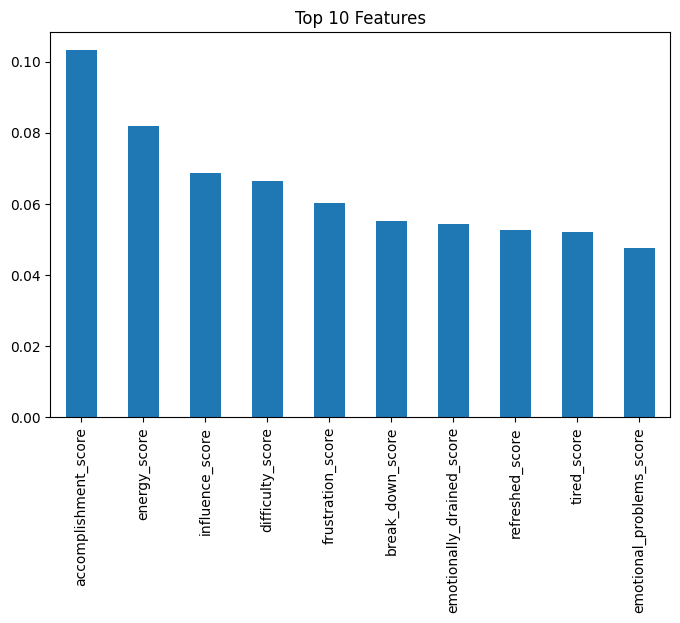

In [16]:
# you can reduce the number of important features to 5

feature_importance_plot(rf, X_train, n=10)

In [17]:
# to know how well our model is performance, we use an accuracy code. below the model makes predictions

y_pred = rf.predict(X_test)

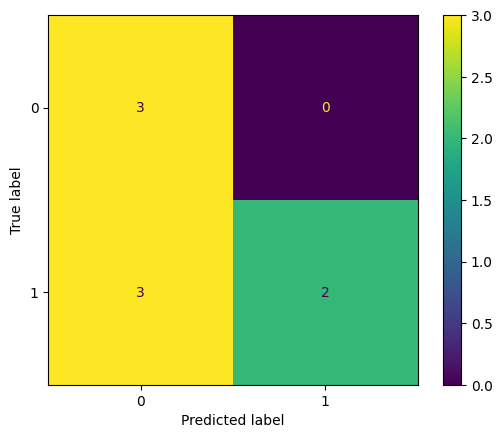

In [18]:
# Confusion Matrix

cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                               display_labels=rf.classes_)

disp.plot()
plt.show()

# yellow is where they made an incorrect prediction, 
# green is where a correct prediction is made. 
# - dont look at the colours! 
# THOSE THAT ARE DIAGONAL ARE ONES PREDICTED CORRECTLY AS TO LOOK AT THE THE ACCURACY % 
# YOU LOOK AT THE NUMBERS e.g (3+2)/8 !!right now we have a 60% accurage. 
# so we need more data to train on

In [19]:
# this calculates accuracy, using code 
accuracy_score(y_test,y_pred)

0.625